In [2]:
from pipeline import TrainingPipeline
from data_preprocessing.feature_engineering import FeatureEngineer
from data_preprocessing.outliers_detection import OutlierProcessing
from training.data_splitting import DataSplitter

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
cleaned_data = TrainingPipeline().training_pipeline()
cleaned_data

c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\extract_ingest\ingest.py:25: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filePath, delimiter=';')
c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\data_preprocessing\type_convert.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors="coerce")


,Datetime,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage
0,2006-12-16,1209.176,34.922,0.0,546.0,4926.0,236.243763
1,2006-12-17,3390.460,226.006,2033.0,4187.0,13341.0,240.087028
2,2006-12-18,2203.826,161.792,1063.0,2621.0,14018.0,241.231694
3,2006-12-19,1666.194,150.942,839.0,7602.0,6197.0,241.999313
4,2006-12-20,2225.748,160.998,0.0,2648.0,14063.0,242.308062
...,...,...,...,...,...,...,...
1437,2010-11-22,2041.536,142.354,4855.0,2110.0,10136.0,240.197118
1438,2010-11-23,1577.536,137.450,1871.0,458.0,7611.0,240.575528
1439,2010-11-24,1796.248,132.460,1096.0,2848.0,12224.0,240.030965
1440,2010-11-25,1431.164,116.128,1076.0,426.0,5072.0,241.536257


In [4]:
# cleaned_data['hour'] = cleaned_data['Datetime'].dt.hour
# cleaned_data['day_of_week'] = cleaned_data['Datetime'].dt.day_of_week
# cleaned_data['month'] = cleaned_data['Datetime'].dt.month
# cleaned_data['is_weekend'] = cleaned_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
# def get_season(month):
#     if month in [12, 1, 2]:
#         return "Winter"
#     elif month in [3, 4, 5]:
#         return "Summer"
#     elif month in [6, 7, 8, 9]:
#         return "Monsoon"
#     else:
#         return "Autumn"

# # Apply function to create season column
# cleaned_data['season'] = cleaned_data['month'].apply(get_season)
# cleaned_data.drop(columns=['Datetime', "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Global_reactive_power"], inplace=True)

cleaned_data['Datetime'] = range(1, len(cleaned_data)+1)

In [5]:
cleaned_data

,Datetime,Global_active_power,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage
0,1,1209.176,34.922,0.0,546.0,4926.0,236.243763
1,2,3390.460,226.006,2033.0,4187.0,13341.0,240.087028
2,3,2203.826,161.792,1063.0,2621.0,14018.0,241.231694
3,4,1666.194,150.942,839.0,7602.0,6197.0,241.999313
4,5,2225.748,160.998,0.0,2648.0,14063.0,242.308062
...,...,...,...,...,...,...,...
1437,1438,2041.536,142.354,4855.0,2110.0,10136.0,240.197118
1438,1439,1577.536,137.450,1871.0,458.0,7611.0,240.575528
1439,1440,1796.248,132.460,1096.0,2848.0,12224.0,240.030965
1440,1441,1431.164,116.128,1076.0,426.0,5072.0,241.536257


In [6]:
cleaned_data.drop(columns=["Voltage", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3", "Global_reactive_power"], inplace=True)

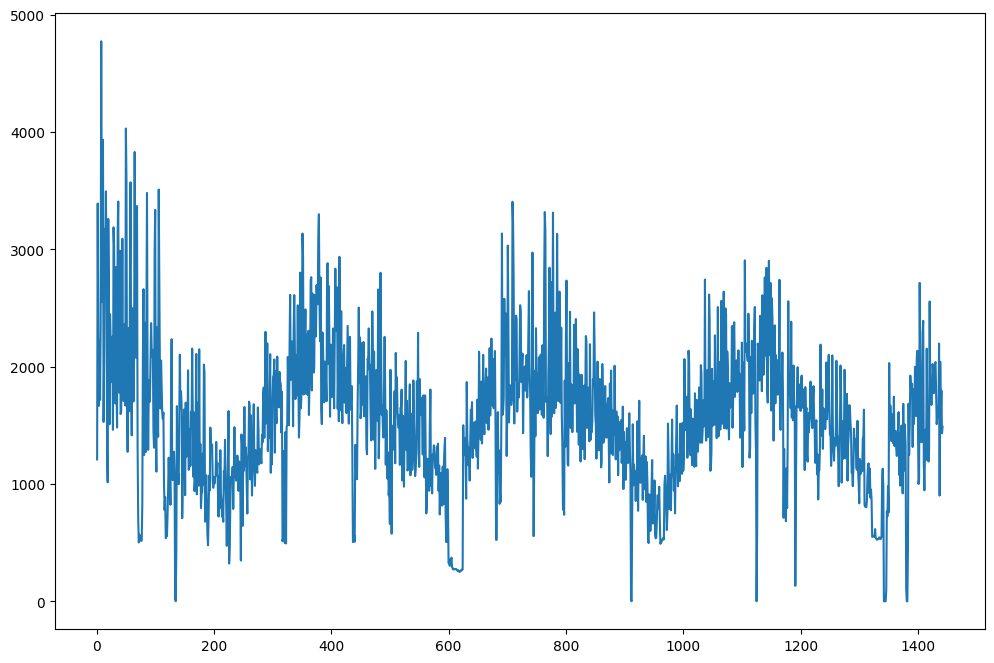

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(cleaned_data['Datetime'], cleaned_data['Global_active_power'])
plt.show()

In [8]:
# f1 = FeatureEngineer()
# featured_data = f1.execute_transformation(cleaned_data, 'Voltage', "StandardScalling")
# featured_data = f1.execute_transformation(featured_data, 'Global_active_power', "StandardScalling")
# featured_data = f1.execute_transformation(featured_data, 'season', "LabelEncoding")

In [9]:
cleaned_data = OutlierProcessing().process_outliers(cleaned_data, cleaned_data.columns, "IQROutlierDetection")
cleaned_data

,Datetime,Global_active_power
0,1,1209.176
2,3,2203.826
3,4,1666.194
4,5,2225.748
5,6,1716.624
...,...,...
1437,1438,2041.536
1438,1439,1577.536
1439,1440,1796.248
1440,1441,1431.164


In [10]:
X = np.array(cleaned_data['Datetime']).reshape(-1, 1)
y = np.array(cleaned_data['Global_active_power'])

In [11]:
sx = StandardScaler()
sy = StandardScaler()

X_norm = sx.fit_transform(X.reshape(-1, 1))
y_norm = sy.fit_transform(y.reshape(-1, 1))

In [12]:
print(X_norm.shape, y_norm.shape)

(1399, 1) (1399, 1)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.1, shuffle=True, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1259, 1) (140, 1) (1259, 1) (140, 1)


In [97]:
X_lin_1d = np.linspace(X_norm.min(), X_norm.max(), 100).reshape(-1, 1)
X_lin_1d.shape

(100, 1)

In [98]:
errors = {}
def plot_fit_predict(model, X_norm_train, y_norm_train, X_norm_test, y_norm_test, X_lin, title, plot=True):
    model.fit(X_norm_train, y_norm_train)

    y_hat_train = model.predict(X_norm_train).reshape(-1, 1)
    y_hat_test = model.predict(X_norm_test).reshape(-1, 1)
    y_hat_lin = model.predict(X_lin).reshape(-1, 1)

    # Inverse transform predictions and actual labels
    y_hat_train = sy.inverse_transform(y_hat_train)
    y_hat_test = sy.inverse_transform(y_hat_test)
    y_hat_lin = sy.inverse_transform(y_hat_lin)

    y_train_orig = sy.inverse_transform(y_norm_train.reshape(-1, 1))
    y_test_orig = sy.inverse_transform(y_norm_test.reshape(-1, 1))

    errors[title] = {
        "train": mean_squared_error(y_train_orig, y_hat_train),
        "test": mean_squared_error(y_test_orig, y_hat_test)
    }

    if plot:
        plt.plot(sx.inverse_transform(X_train), y_train_orig, 'o', label='train', markersize=1)
        plt.plot(sx.inverse_transform(X_test), y_test_orig, 'o', label='test', ms=3)
        plt.plot(sx.inverse_transform(X_lin_1d), y_hat_lin, label='model')
        plt.xlabel('Days since first measurement')
        plt.ylabel('Global_active_power')
        plt.legend()
        plt.title('{}\n Train MSE: {:.2f} | Test MSE: {:.2f}'.format(
            title, errors[title]["train"], errors[title]["test"]))

    return errors[title]


{'train': 292899.34337292955, 'test': 298697.810722001}

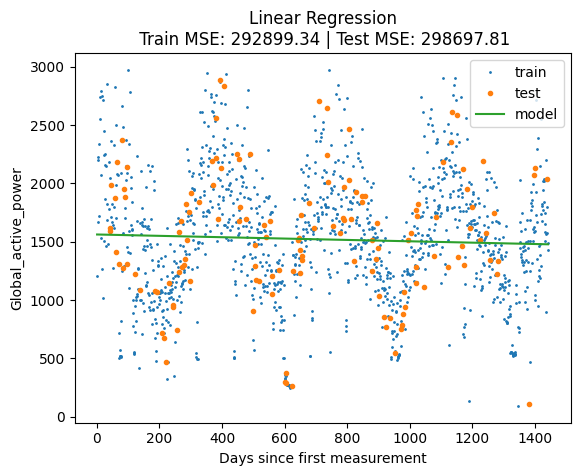

In [99]:
model = LinearRegression()
plot_fit_predict(model, X_train, y_train, X_test, y_test, X_lin_1d, "Linear Regression")

c:\projects\ml_learn\End-To-End-Projects\Electricity_Consumption_Predictor\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'train': 164588.65495362124, 'test': 140600.8469710185}

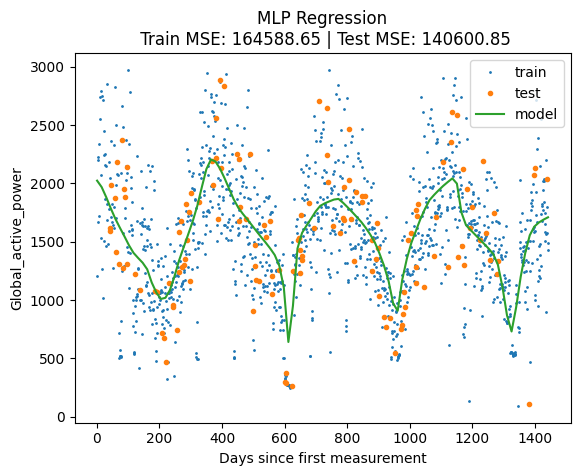

In [100]:
mlp_model = MLPRegressor(hidden_layer_sizes=[128, 256, 512, 1024, 512, 256, 128], max_iter = 10000)

plot_fit_predict(mlp_model, X_train, y_train, X_test, y_test, X_lin_1d, "MLP Regression")

In [101]:
def create_poly_feature(X, d):
    X_poly = np.zeros((len(X), d))
    X_poly[:, 0] = X[:, 0]
    for i in range(1, d):
        X_poly[:, i] = X[:, 0] ** (i + 1)
    
    X_poly = StandardScaler().fit_transform(X_poly)
    return X_poly

{'train': 168889.8119298289, 'test': 200565.14509223631}

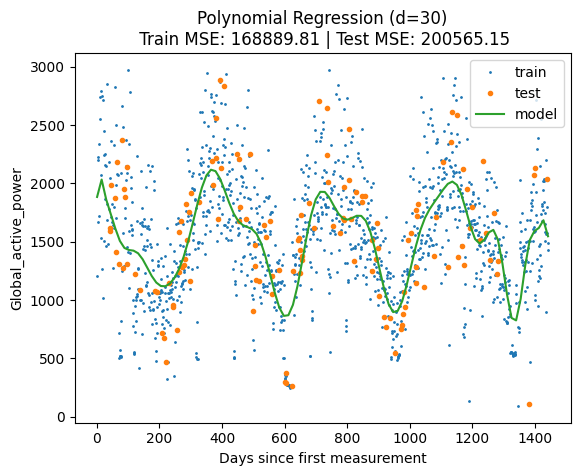

In [102]:
model2 = LinearRegression()
degree = 30
Xf_norm_train = create_poly_feature(X_train.reshape(-1, 1), degree)
Xf_norm_test = create_poly_feature(X_test.reshape(-1, 1), degree)
X_lin_poly = create_poly_feature(X_lin_1d, degree)

plot_fit_predict(model2, Xf_norm_train, y_train, Xf_norm_test, y_test, X_lin_poly, f"Polynomial Regression (d={degree})")

In [103]:
model2.coef_, model2.intercept_

(array([[-1.74002393e+00, -3.24362163e+01,  3.55462017e+02,
          1.09569582e+03, -1.13969197e+04, -2.05583567e+04,
          1.67679173e+05,  2.36931836e+05, -1.44040664e+06,
         -1.77323529e+06,  8.01925935e+06,  9.07194151e+06,
         -3.05941585e+07, -3.28607359e+07,  8.25464693e+07,
          8.60164645e+07, -1.60059690e+08, -1.64186831e+08,
          2.23840639e+08,  2.28298015e+08, -2.23726607e+08,
         -2.28466065e+08,  1.55809349e+08,  1.60118468e+08,
         -7.17914912e+07, -7.45330645e+07,  1.96627207e+07,
          2.06880750e+07, -2.42271890e+06, -2.59046822e+06]]),
 array([-0.00473586]))

In [104]:
# bias variance tradeoff

errors_poly = {}

for degree in range(1, 35):
    Xf_norm_train = create_poly_feature(X_train.reshape(-1, 1), degree)
    Xf_norm_test = create_poly_feature(X_test.reshape(-1, 1), degree)

    X_lin_poly = create_poly_feature(X_lin_1d, degree)

    plot_fit_predict(model2, Xf_norm_train, y_train, Xf_norm_test, y_test, X_lin_poly, degree, plot=False)

    # geting errors for polynomial regression only for plotting
    errors_poly[degree] = errors[degree]

Best degree: 13, Min error: 185245.19391759683


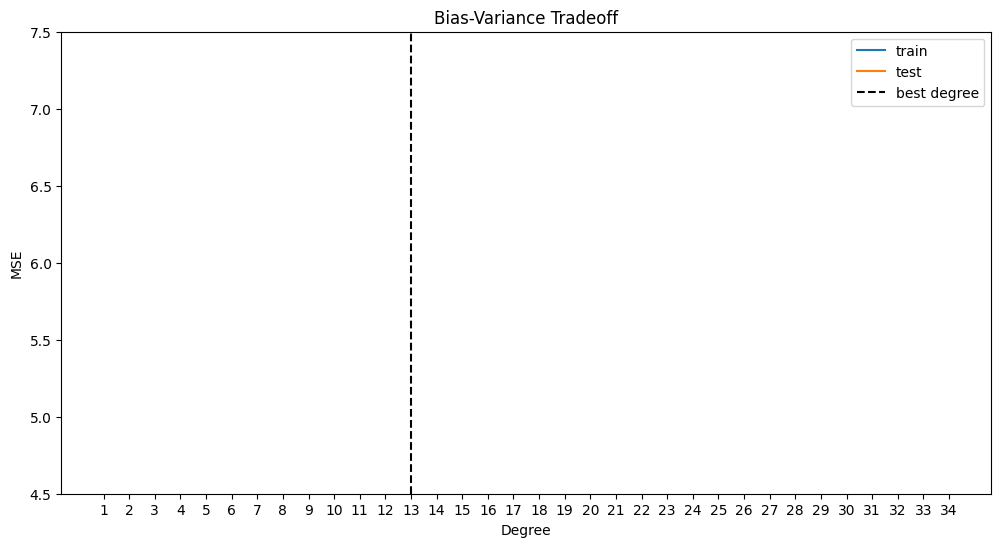

In [105]:
errors_poly_df = pd.DataFrame(errors_poly).T
best_degree = np.argmin(errors_poly_df.test) + 1
min_error = errors_poly_df.test[best_degree - 1]    # index of df = degree - 1
print(f"Best degree: {best_degree}, Min error: {min_error}")

# set figure size
plt.figure(figsize=(12, 6))
plt.plot(errors_poly_df.index.values, errors_poly_df.train.values, label='train')
plt.plot(errors_poly_df.index.values, errors_poly_df.test.values, label='test')
plt.axvline(best_degree, color='black', linestyle='--', label='best degree')
plt.xticks(np.arange(min(errors_poly_df.index), max(errors_poly_df.index)+1, 1.0))
plt.ylim(4.5, 7.5)      # set y limit - to show the difference between train and test clearly
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

In [106]:
def create_guassian_basis(X , d , std = 1):
    """
    X is (N, 1) array
    d is number of basis functions
    """
    means = np.linspace(X.min(), X.max(), d)
    X = np.repeat(X, d, axis=1)
    means = np.repeat(means.reshape(-1, 1), len(X), axis=1).T

    return np.exp(-(X - means) ** 2 / (2 * std ** 2))

{'train': 255342.99473295483, 'test': 67520482.75708954}

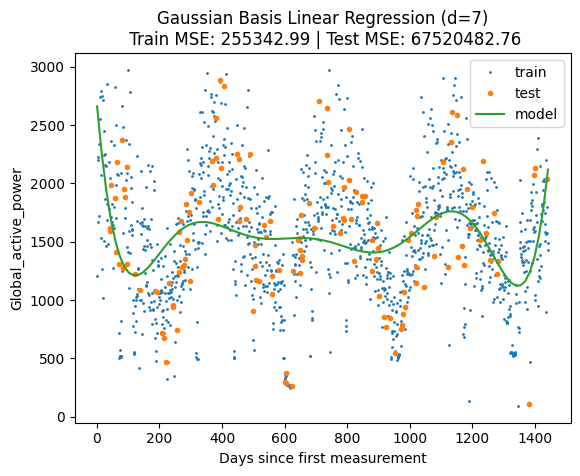

In [107]:
model_gauss = LinearRegression()
degree = 7
Xf_norm_train = create_guassian_basis(X_train.reshape(-1, 1), degree)
Xf_norm_test = create_guassian_basis(X_test.reshape(-1, 1), degree)

X_lin_poly = create_guassian_basis(X_lin_1d, degree)


plot_fit_predict(model2, Xf_norm_train, y_train, Xf_norm_test, y_test, X_lin_poly, f"Gaussian Basis Linear Regression (d={degree})")

In [108]:
errors.clear()
for degree in range(3, 16):
    Xf_norm_train = create_guassian_basis(X_train.reshape(-1, 1), degree)
    Xf_norm_test = create_guassian_basis(X_test.reshape(-1, 1), degree)

    X_lin_poly = create_guassian_basis(X_lin_1d, degree)


    plot_fit_predict(model2, Xf_norm_train, y_train, Xf_norm_test, y_test, X_lin_poly, f"Gaussian Basis Linear Regression (d={degree})", plot=False)

In [109]:
errors_df = pd.DataFrame(errors).T

<Axes: title={'center': 'MSE for Train and Test Sets'}>

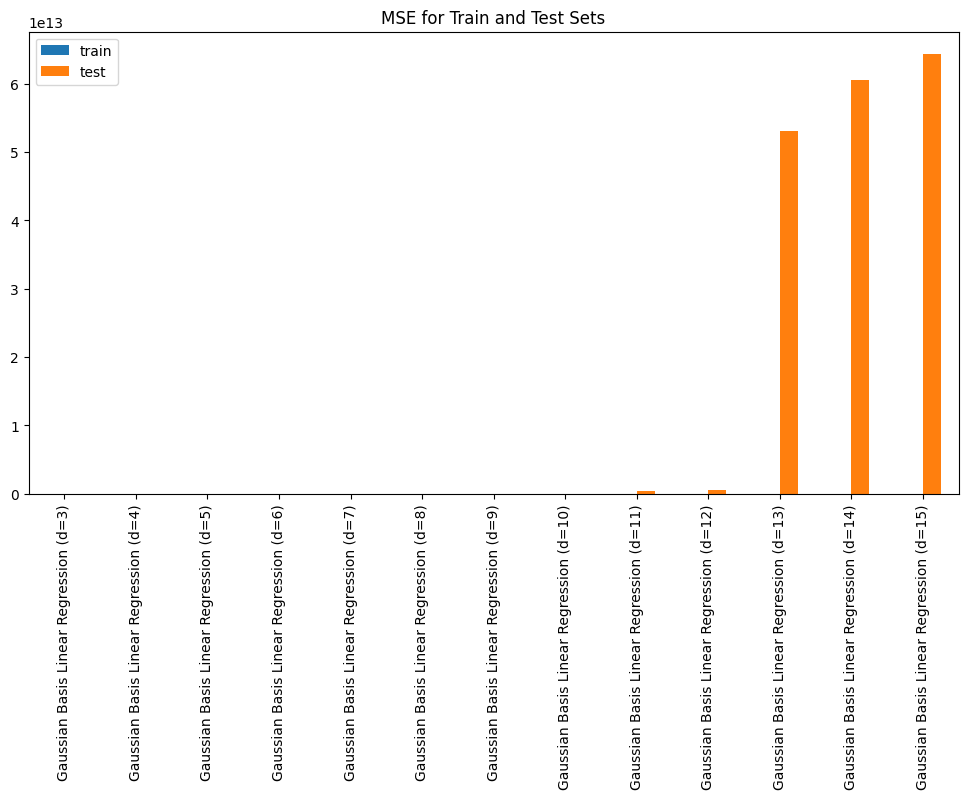

In [110]:
errors_df.plot(kind='bar', figsize=(12, 6), title='MSE for Train and Test Sets')

In [111]:
# Implicit implementation of RFF using sklearn
from sklearn.kernel_approximation import RBFSampler
def create_rff(X, gamma, NUM_features):
    # Random Fourier Features
    # https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.RBFSampler.html
    rbf_feature = RBFSampler(gamma=gamma, n_components=NUM_features, random_state=1)
    X_features = rbf_feature.fit_transform(X)
    return X_features

{'train': 98803.9940939841, 'test': 144186.183261754}

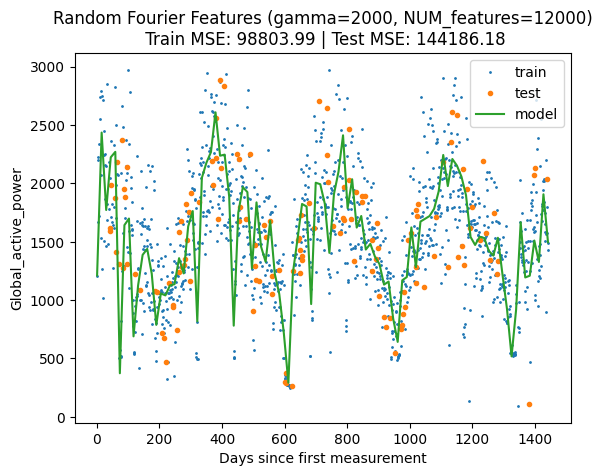

In [112]:
model3 = LinearRegression()
gamma = 2000
NUM_features = 12000

Xf_norm_train = create_rff(X_train.reshape(-1, 1), gamma, NUM_features)
Xf_norm_test = create_rff(X_test.reshape(-1, 1), gamma, NUM_features)

X_lin_rff = create_rff(X_lin_1d, gamma, NUM_features)

plot_fit_predict(model3, Xf_norm_train, y_train, Xf_norm_test, y_test, X_lin_rff, f"Random Fourier Features (gamma={gamma}, NUM_features={NUM_features})")

In [113]:
model4 = LinearRegression()

NUM_features_values = [500, 700, 1000, 1100, 1200, 1300, 1500, 2000, 3000, 4000, 5000, 10000, 12000, 15000, 17000, 20000]
gamma_values = [0.01, 0.1, 1, 2, 5, 10, 50, 100, 200, 500, 700, 1000, 2000, 3000, 5000, 10000]

errors_rff = {}

for num in NUM_features_values:
    gamma = 2000
    NUM_features_ = 100
    Xf_norm_train = create_rff(X_train.reshape(-1, 1), gamma, num)
    Xf_norm_test = create_rff(X_test.reshape(-1, 1), gamma, num)

    X_lin_rff = create_rff(X_lin_1d, gamma, num)

    plot_fit_predict(model4, Xf_norm_train, y_train, Xf_norm_test, y_test, X_lin_rff, num, plot=False)

    errors_rff[num] = errors[num]

In [114]:
errors_rff

{500: {'train': 111118.03158296087, 'test': 147267.147436213},
 700: {'train': 110263.0135721516, 'test': 148399.41617469728},
 1000: {'train': 108186.20565014718, 'test': 148215.2589581108},
 1100: {'train': 107382.78752515408, 'test': 148105.59200884274},
 1200: {'train': 106639.67714371887, 'test': 147152.28148009532},
 1300: {'train': 106896.21251890174, 'test': 150232.69716874964},
 1500: {'train': 104731.49829541426, 'test': 155166.20420011436},
 2000: {'train': 104213.88315897496, 'test': 155512.97704691344},
 3000: {'train': 103255.17949542926, 'test': 159736.22419486148},
 4000: {'train': 102312.95526248297, 'test': 152746.6592052475},
 5000: {'train': 101296.22257914429, 'test': 149857.55177931406},
 10000: {'train': 99144.92129059852, 'test': 144798.17574288222},
 12000: {'train': 98803.9940939841, 'test': 144186.183261754},
 15000: {'train': 97504.16702113327, 'test': 155729.90024334035},
 17000: {'train': 97620.19019332214, 'test': 152695.89837928713},
 20000: {'train': 97

<Axes: >

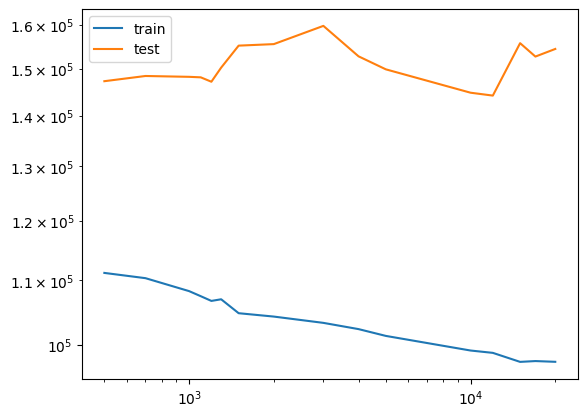

In [115]:
pd.DataFrame(errors_rff).T.plot(logy=True, logx=True)